In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

## Importing data

In [456]:
df = pd.read_csv("pd_speech_features.csv")

In [457]:
n=754
df.head(n=n)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,249,1,0.81171,0.79637,0.32824,336,335,0.005739,0.000041,0.00079,...,71.9877,52.2558,26.1383,8.8848,7.5768,18.2321,28.5223,18.9284,15.5225,1
750,250,0,0.83172,0.57849,0.36017,375,374,0.005147,0.000036,0.00088,...,2.9830,3.3785,3.1691,2.9234,2.5662,2.4621,2.7629,3.0735,5.1190,0
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0


In [458]:
len(df)

756

In [459]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [461]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [462]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

## Visualize data

In [463]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



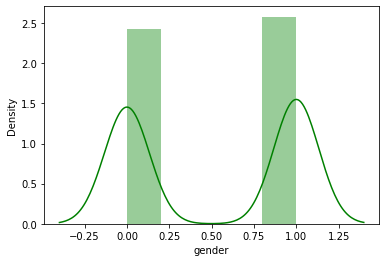

In [464]:
sns.distplot(df["gender"], color = "Green");

In [465]:
pd.crosstab(df["class"], df["gender"])

gender,0,1
class,,
0,123,69
1,243,321


In [466]:
condition = ["Does not have Parkinson's","Does have Parkinson's"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["class"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether patient has Parkinson's or not")
fig.show()

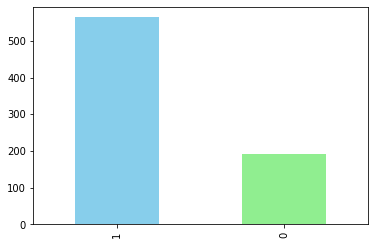

In [467]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "lightgreen"]);

In [ ]:
sns.distplot(df["numPulses"], color = "maroon");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



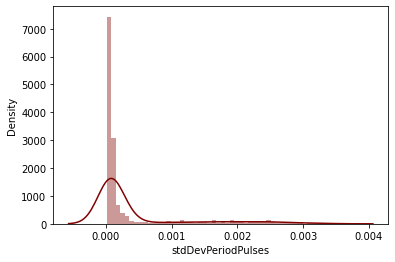

In [469]:
sns.distplot(df["stdDevPeriodPulses"], color = "maroon");

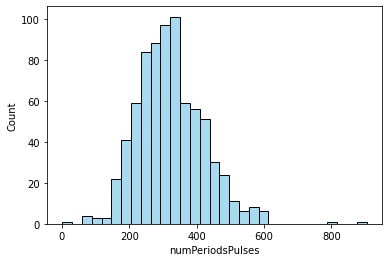

In [470]:
sns.histplot(df["numPeriodsPulses"], color = "skyblue");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



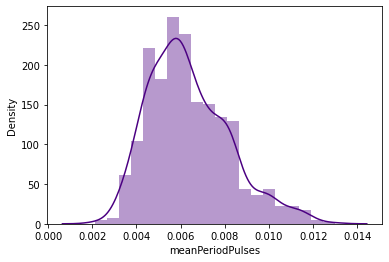

In [471]:
sns.distplot(df["meanPeriodPulses"], color = "indigo");

## Fit and instantiate mode

In [472]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [473]:
X=df.drop("class", axis = 1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [474]:
models = {
            "Linear SVM": LinearSVC(),
            "Random Forest": RandomForestClassifier(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "Bagging Classifier": BaggingClassifier()
         }


In [475]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1186: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'Linear SVM': 0.23026315789473684,
 'Random Forest': 0.868421052631579,
 'KNeighborsClassifier': 0.7302631578947368,
 'Bagging Classifier': 0.8486842105263158}

In [476]:
model_scores = model_scores.values()
model_scores = list(model_scores)

svc = model_scores[0]
random_forest = model_scores[1]
neighbors = model_scores[2]
bagging = model_scores[3]

In [477]:
model_scores

[0.23026315789473684,
 0.868421052631579,
 0.7302631578947368,
 0.8486842105263158]

In [478]:

print(f"Linear SVM: {svc * 100:.2f}%")
print(f"Random Forest Classifier: {random_forest * 100:.2f}%")
print(f"KNeighbors Classifier: {neighbors * 100:.2f}%")
print(f"Bagging Classifier: {bagging * 100:.2f}%")

Linear SVM: 23.03%
Random Forest Classifier: 86.84%
KNeighbors Classifier: 73.03%
Bagging Classifier: 84.87%


In [479]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    # print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
    print(f"MSE: {mean_squared_error(y_test, y_preds)}")
    ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1186: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy: 23.03%
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
MAE: 0.7697368421052632
MSE: 0.7697368421052632
None
Accuracy: 73.03%
Precision: 0.7906976744186046
Recall: 0.8793103448275862
F1 Score: 0.8326530612244898
MAE: 0.26973684210526316
MSE: 0.26973684210526316
None
Accuracy: 84.87%
Precision: 0.872
Recall: 0.9396551724137931
F1 Score: 0.9045643153526971
MAE: 0.1513157894736842
MSE: 0.1513157894736842
None
Accuracy: 87.50%
Precision: 0.8646616541353384
Recall: 0.9913793103448276
F1 Score: 0.9236947791164658
MAE: 0.125
MSE: 0.125
None


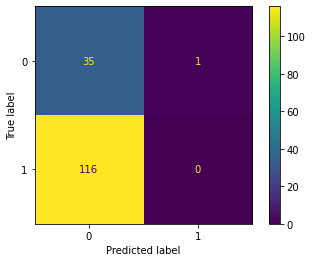

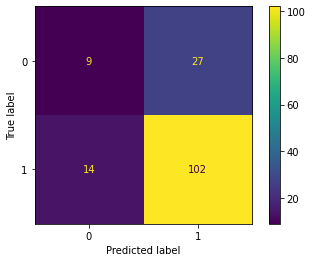

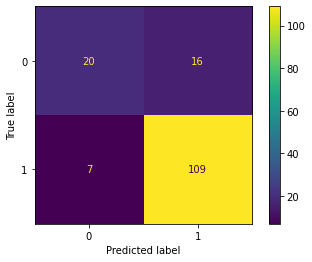

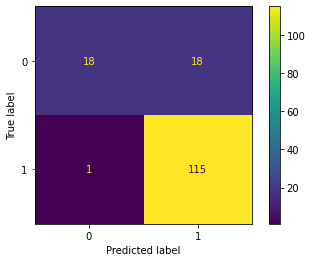

In [480]:
np.random.seed(42)
model1 = LinearSVC()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)
y_pred = model1.predict(X_test)
print(model_report(y_test,y_pred))
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)
y_pred = model2.predict(X_test)
print(model_report(y_test,y_pred))
model3 = BaggingClassifier()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)
y_pred = model3.predict(X_test)
print(model_report(y_test,y_pred))
model4 = RandomForestClassifier(n_estimators = 100)
model4.fit(X_train, y_train)
model4.score(X_test, y_test)
y_pred = model4.predict(X_test)
print(model_report(y_test,y_pred))

In [487]:
y_probs = model3.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.3, 1. , 0.3, 0.9, 1. , 1. , 0.7, 0.3, 0.6, 1. ])

In [488]:
roc_auc_score(y_test, y_probs_positive)

0.8503352490421456

In [489]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

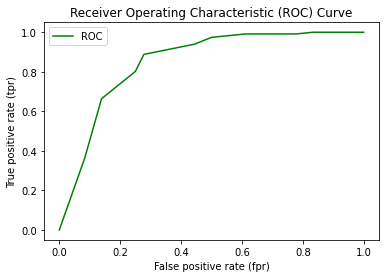

In [490]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)

In [491]:
X = df.iloc[:,0:-1]
y = df["class"]

In [492]:
X.head(n=n)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,249,1,0.81171,0.79637,0.32824,336,335,0.005739,0.000041,0.00079,...,11.3087,71.9877,52.2558,26.1383,8.8848,7.5768,18.2321,28.5223,18.9284,15.5225
750,250,0,0.83172,0.57849,0.36017,375,374,0.005147,0.000036,0.00088,...,10.6174,2.9830,3.3785,3.1691,2.9234,2.5662,2.4621,2.7629,3.0735,5.1190
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170


In [ ]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

In [494]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [495]:
feature_names=tuple(X.columns)
feature_names


('id',
 'gender',
 'PPE',
 'DFA',
 'RPDE',
 'numPulses',
 'numPeriodsPulses',
 'meanPeriodPulses',
 'stdDevPeriodPulses',
 'locPctJitter',
 'locAbsJitter',
 'rapJitter',
 'ppq5Jitter',
 'ddpJitter',
 'locShimmer',
 'locDbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'apq11Shimmer',
 'ddaShimmer',
 'meanAutoCorrHarmonicity',
 'meanNoiseToHarmHarmonicity',
 'meanHarmToNoiseHarmonicity',
 'minIntensity',
 'maxIntensity',
 'meanIntensity',
 'f1',
 'f2',
 'f3',
 'f4',
 'b1',
 'b2',
 'b3',
 'b4',
 'GQ_prc5_95',
 'GQ_std_cycle_open',
 'GQ_std_cycle_closed',
 'GNE_mean',
 'GNE_std',
 'GNE_SNR_TKEO',
 'GNE_SNR_SEO',
 'GNE_NSR_TKEO',
 'GNE_NSR_SEO',
 'VFER_mean',
 'VFER_std',
 'VFER_entropy',
 'VFER_SNR_TKEO',
 'VFER_SNR_SEO',
 'VFER_NSR_TKEO',
 'VFER_NSR_SEO',
 'IMF_SNR_SEO',
 'IMF_SNR_TKEO',
 'IMF_SNR_entropy',
 'IMF_NSR_SEO',
 'IMF_NSR_TKEO',
 'IMF_NSR_entropy',
 'mean_Log_energy',
 'mean_MFCC_0th_coef',
 'mean_MFCC_1st_coef',
 'mean_MFCC_2nd_coef',
 'mean_MFCC_3rd_coef',
 'mean_MFCC_4th_coef',


In [ ]:
X.shape, y.shape

In [497]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([1.56742770e-01, 1.09380579e-03, 0.00000000e+00, 3.68806806e-02,
       9.22636601e-03, 7.58059167e-02, 7.57221974e-02, 6.64293292e-02,
       5.18503292e-02, 5.02604880e-02, 7.81835844e-02, 6.12729445e-02,
       7.09881584e-02, 6.46149881e-02, 4.10607141e-02, 5.14579482e-02,
       2.18916621e-02, 3.72103718e-02, 5.93431679e-02, 2.22349424e-02,
       3.33267682e-02, 3.88752891e-02, 3.06615382e-02, 6.72477085e-02,
       7.00656915e-02, 5.66674929e-02, 4.30763338e-02, 0.00000000e+00,
       1.65806466e-02, 0.00000000e+00, 1.31338025e-02, 4.02075473e-03,
       9.11870328e-03, 3.87959712e-03, 4.22977473e-02, 4.56434776e-02,
       0.00000000e+00, 5.78800091e-02, 4.53697120e-02, 3.81431904e-03,
       7.78165343e-03, 5.53097525e-04, 6.89763807e-04, 1.84942919e-02,
       1.39920735e-02, 4.85218643e-02, 1.12295539e-02, 5.87572165e-03,
       7.31369440e-03, 2.02537098e-02, 1.95899697e-02, 1.18261583e-02,
       5.22831272e-03, 9.39854754e-03, 3.56189904e-02, 2.85058519e-02,
      

## Selecting top 60 features

In [500]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
Y=mutual_info.sort_values(ascending=False).head(60)
print(Y)

id                                0.156743
std_delta_delta_log_energy        0.120052
tqwt_entropy_log_dec_35           0.112637
mean_MFCC_2nd_coef                0.107390
tqwt_stdValue_dec_15              0.103992
tqwt_skewnessValue_dec_22         0.102129
app_entropy_shannon_5_coef        0.102025
tqwt_TKEO_mean_dec_16             0.101822
app_entropy_log_3_coef            0.101775
app_entropy_shannon_4_coef        0.100748
app_entropy_log_5_coef            0.100521
app_LT_entropy_shannon_6_coef     0.099794
std_8th_delta                     0.099750
std_6th_delta_delta               0.097881
app_LT_entropy_log_5_coef         0.097478
app_TKEO_std_7_coef               0.097117
tqwt_entropy_log_dec_17           0.096929
tqwt_TKEO_std_dec_12              0.096101
std_11th_delta_delta              0.095462
tqwt_entropy_shannon_dec_35       0.095366
app_entropy_shannon_7_coef        0.095167
app_LT_entropy_shannon_10_coef    0.095002
app_LT_entropy_shannon_9_coef     0.094448
app_LT_entr

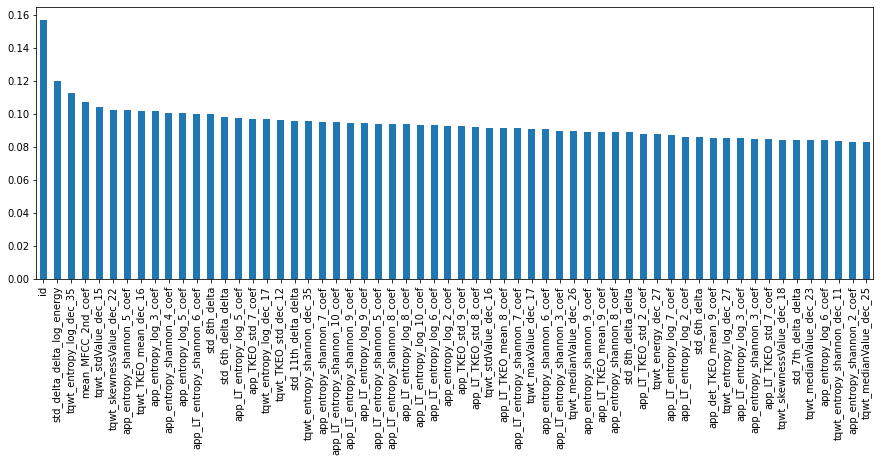

In [501]:
Y.plot.bar(figsize=(15,5))

In [502]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=60)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['id', 'mean_MFCC_2nd_coef', 'std_6th_delta', 'std_8th_delta',
       'std_delta_delta_log_energy', 'std_6th_delta_delta',
       'std_7th_delta_delta', 'std_8th_delta_delta', 'std_11th_delta_delta',
       'app_entropy_shannon_2_coef', 'app_entropy_shannon_3_coef',
       'app_entropy_shannon_4_coef', 'app_entropy_shannon_5_coef',
       'app_entropy_shannon_6_coef', 'app_entropy_shannon_7_coef',
       'app_entropy_shannon_8_coef', 'app_entropy_shannon_9_coef',
       'app_entropy_log_2_coef', 'app_entropy_log_3_coef',
       'app_entropy_log_5_coef', 'app_entropy_log_6_coef',
       'app_det_TKEO_mean_9_coef', 'app_TKEO_std_7_coef',
       'app_TKEO_std_9_coef', 'app_LT_entropy_shannon_3_coef',
       'app_LT_entropy_shannon_5_coef', 'app_LT_entropy_shannon_6_coef',
       'app_LT_entropy_shannon_7_coef', 'app_LT_entropy_shannon_8_coef',
       'app_LT_entropy_shannon_9_coef', 'app_LT_entropy_shannon_10_coef',
       'app_LT_entropy_log_2_coef', 'app_LT_entropy_log_3_coef',
  

In [503]:
df1=df[['id', 'minIntensity', 'GQ_std_cycle_open', 'mean_MFCC_1st_coef',
       'mean_MFCC_2nd_coef', 'std_delta_log_energy', 'std_6th_delta',
       'std_9th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta',
       'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta',
       'app_entropy_shannon_5_coef', 'app_entropy_shannon_6_coef',
       'app_entropy_shannon_7_coef', 'app_entropy_shannon_8_coef',
       'app_entropy_shannon_9_coef', 'app_entropy_shannon_10_coef',
       'app_entropy_log_6_coef', 'app_entropy_log_7_coef',
       'app_TKEO_std_9_coef', 'app_LT_entropy_shannon_6_coef',
       'app_LT_entropy_shannon_7_coef', 'app_LT_entropy_shannon_8_coef',
       'app_LT_entropy_shannon_9_coef', 'app_LT_entropy_shannon_10_coef',
       'app_LT_entropy_log_7_coef', 'app_LT_entropy_log_8_coef',
       'app_LT_entropy_log_9_coef', 'app_LT_entropy_log_10_coef',
       'tqwt_energy_dec_5', 'tqwt_energy_dec_26', 'tqwt_energy_dec_27',
       'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14',
       'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16',
       'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12',
       'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_17',
       'tqwt_entropy_log_dec_35', 'tqwt_TKEO_mean_dec_8',
       'tqwt_TKEO_mean_dec_11', 'tqwt_TKEO_mean_dec_16',
       'tqwt_TKEO_mean_dec_17', 'tqwt_TKEO_std_dec_12', 'tqwt_TKEO_std_dec_13',
       'tqwt_medianValue_dec_8', 'tqwt_medianValue_dec_25',
       'tqwt_stdValue_dec_12', 'tqwt_stdValue_dec_15', 'tqwt_minValue_dec_10',
       'tqwt_minValue_dec_11', 'tqwt_minValue_dec_17', 'tqwt_maxValue_dec_13',
       'tqwt_skewnessValue_dec_22', 'tqwt_skewnessValue_dec_30',
       'tqwt_kurtosisValue_dec_18']].copy()

In [504]:
sfs1 = sfs(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LogisticRegression(max_iter=100000000),
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(df1, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished

[2022-12-08 15:37:58] Features: 1/60 -- score: 0.7843915343915344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.3s finished

[2022-12-08 15:37:59] Features: 2/60 -- score: 0.8108465608465608[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    3.2s finished

[2022-12-08 15:38:02] Features: 3/60 -- score: 0.8201058201058201[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [423]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([0.78439153]),
  'avg_score': 0.7843915343915344,
  'feature_names': ('mean_MFCC_2nd_coef',)},
 2: {'feature_idx': (4, 42),
  'cv_scores': array([0.81084656]),
  'avg_score': 0.8108465608465608,
  'feature_names': ('mean_MFCC_2nd_coef', 'tqwt_entropy_log_dec_35')},
 3: {'feature_idx': (4, 19, 42),
  'cv_scores': array([0.82010582]),
  'avg_score': 0.8201058201058201,
  'feature_names': ('mean_MFCC_2nd_coef',
   'app_entropy_log_6_coef',
   'tqwt_entropy_log_dec_35')},
 4: {'feature_idx': (4, 19, 42, 59),
  'cv_scores': array([0.82671958]),
  'avg_score': 0.8267195767195767,
  'feature_names': ('mean_MFCC_2nd_coef',
   'app_entropy_log_6_coef',
   'tqwt_entropy_log_dec_35',
   'tqwt_kurtosisValue_dec_18')},
 5: {'feature_idx': (4, 19, 28, 42, 59),
  'cv_scores': array([0.83068783]),
  'avg_score': 0.8306878306878307,
  'feature_names': ('mean_MFCC_2nd_coef',
   'app_entropy_log_6_coef',
   'app_LT_entropy_log_8_coef',
   'tqwt_entropy_log_d

In [ ]:
sfs1.get_metric_dict()


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



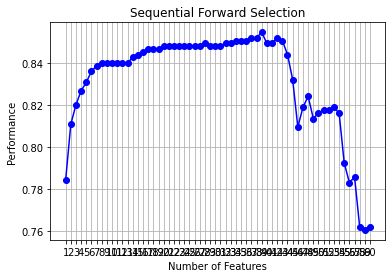

In [425]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

In [427]:
df1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df1[["feature_idx","avg_score"]]

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



,feature_idx,avg_score
1,"(4,)",0.784392
2,"(4, 42)",0.810847
3,"(4, 19, 42)",0.820106
4,"(4, 19, 42, 59)",0.82672
5,"(4, 19, 28, 42, 59)",0.830688
6,"(1, 4, 19, 28, 42, 59)",0.835979
7,"(1, 4, 19, 28, 35, 42, 59)",0.838624
8,"(1, 4, 19, 28, 33, 35, 42, 59)",0.839947
9,"(1, 4, 5, 19, 28, 33, 35, 42, 59)",0.839947
10,"(1, 4, 5, 7, 19, 28, 33, 35, 42, 59)",0.839947


In [428]:
df2=df[['id',
  'minIntensity',
  'GQ_std_cycle_open',
  'mean_MFCC_2nd_coef',
  'std_delta_log_energy',
  'std_6th_delta',
  'std_9th_delta',
  'std_delta_delta_log_energy',
  'std_6th_delta_delta',
  'std_7th_delta_delta',
  'std_8th_delta_delta',
  'std_9th_delta_delta',
  'app_entropy_log_6_coef',
  'app_entropy_log_7_coef',
  'app_LT_entropy_log_7_coef',
  'app_LT_entropy_log_8_coef',
  'app_LT_entropy_log_9_coef',
  'app_LT_entropy_log_10_coef',
  'tqwt_energy_dec_5',
  'tqwt_energy_dec_26',
  'tqwt_energy_dec_27',
  'tqwt_entropy_shannon_dec_13',
  'tqwt_entropy_shannon_dec_14',
  'tqwt_entropy_shannon_dec_16',
  'tqwt_entropy_log_dec_35',
  'tqwt_TKEO_mean_dec_8',
  'tqwt_TKEO_mean_dec_11',
  'tqwt_TKEO_mean_dec_17',
  'tqwt_TKEO_std_dec_12',
  'tqwt_TKEO_std_dec_13',
  'tqwt_medianValue_dec_8',
  'tqwt_medianValue_dec_25',
  'tqwt_stdValue_dec_12',
  'tqwt_stdValue_dec_15',
  'tqwt_minValue_dec_10',
  'tqwt_minValue_dec_11',
  'tqwt_maxValue_dec_13',
  'tqwt_skewnessValue_dec_22',
  'tqwt_kurtosisValue_dec_18']].copy()

In [429]:
df2.describe()

,id,minIntensity,GQ_std_cycle_open,mean_MFCC_2nd_coef,std_delta_log_energy,std_6th_delta,std_9th_delta,std_delta_delta_log_energy,std_6th_delta_delta,std_7th_delta_delta,...,tqwt_TKEO_std_dec_13,tqwt_medianValue_dec_8,tqwt_medianValue_dec_25,tqwt_stdValue_dec_12,tqwt_stdValue_dec_15,tqwt_minValue_dec_10,tqwt_minValue_dec_11,tqwt_maxValue_dec_13,tqwt_skewnessValue_dec_22,tqwt_kurtosisValue_dec_18
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,7.560000e+02,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000
mean,125.500000,70.828609,32.295832,1.263836,0.037517,0.044736,0.037199,0.013872,0.021152,0.019708,...,7.393367e-03,-6.953106e-07,0.000351,0.024786,0.120335,-0.074758,-0.079862,0.193206,1.913223e-04,2.608229
std,72.793721,8.858268,31.140746,1.665414,0.029668,0.014775,0.011144,0.009239,0.006775,0.006113,...,1.578713e-02,2.394583e-05,0.004159,0.029236,0.091410,0.058247,0.066326,0.155757,1.523147e-02,1.229086
min,0.000000,28.651529,1.735500,-3.556600,0.005666,0.019006,0.014420,0.001998,0.009302,0.006962,...,3.050000e-07,-2.849900e-04,-0.027176,0.000174,0.000928,-0.382800,-0.397930,0.001996,-2.694800e-01,1.564400
25%,62.750000,67.248014,9.764675,0.214117,0.021443,0.033874,0.029254,0.007817,0.016405,0.015301,...,3.990725e-04,-3.127500e-06,-0.000137,0.006580,0.044971,-0.109563,-0.111050,0.076836,-2.377525e-04,2.033900
50%,125.500000,74.121030,18.768600,1.371750,0.030812,0.041332,0.034218,0.011565,0.019261,0.018355,...,1.734350e-03,3.110000e-20,0.000000,0.014042,0.100527,-0.060430,-0.062197,0.152200,2.072000e-18,2.369450
75%,188.250000,76.850515,45.821475,2.546875,0.045133,0.052899,0.043828,0.017111,0.025073,0.022975,...,7.017950e-03,3.422500e-06,0.000721,0.032342,0.183075,-0.029011,-0.031829,0.271077,5.994200e-04,2.823100
max,251.000000,83.908349,194.360800,5.758400,0.328640,0.116800,0.080942,0.077497,0.051847,0.051744,...,2.365500e-01,1.162400e-04,0.030424,0.280760,0.484160,-0.000465,-0.000547,1.141600,1.475500e-01,25.415600


In [430]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           756 non-null    int64  
 1   minIntensity                 756 non-null    float64
 2   GQ_std_cycle_open            756 non-null    float64
 3   mean_MFCC_2nd_coef           756 non-null    float64
 4   std_delta_log_energy         756 non-null    float64
 5   std_6th_delta                756 non-null    float64
 6   std_9th_delta                756 non-null    float64
 7   std_delta_delta_log_energy   756 non-null    float64
 8   std_6th_delta_delta          756 non-null    float64
 9   std_7th_delta_delta          756 non-null    float64
 10  std_8th_delta_delta          756 non-null    float64
 11  std_9th_delta_delta          756 non-null    float64
 12  app_entropy_log_6_coef       756 non-null    float64
 13  app_entropy_log_7_co

In [431]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [432]:
X = df2
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [433]:
models = {
            "Linear SVM": LinearSVC(),
            "Random Forest": RandomForestClassifier(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "Bagging Classifier": BaggingClassifier()
         }

In [434]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1186: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'Linear SVM': 0.75,
 'Random Forest': 0.8486842105263158,
 'KNeighborsClassifier': 0.8026315789473685,
 'Bagging Classifier': 0.8157894736842105}

In [ ]:

print(f"Linear SVM: {svc * 100:.2f}%")
print(f"Random Forest Classifier: {random_forest * 100:.2f}%")
print(f"KNeighbors Classifier: {neighbors * 100:.2f}%")
print(f"Bagging Classifier: {bagging * 100:.2f}%")

In [439]:
y_preds = model.predict(X_test)

In [508]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    # print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
    print(f"MSE: {mean_squared_error(y_test, y_preds)}")
    ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1186: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy: 76.32%
Precision: 0.7631578947368421
Recall: 1.0
F1 Score: 0.8656716417910448
MAE: 0.23684210526315788
MSE: 0.23684210526315788
None
Accuracy: 73.03%
Precision: 0.7906976744186046
Recall: 0.8793103448275862
F1 Score: 0.8326530612244898
MAE: 0.26973684210526316
MSE: 0.26973684210526316
None
Accuracy: 84.87%
Precision: 0.8842975206611571
Recall: 0.9224137931034483
F1 Score: 0.9029535864978903
MAE: 0.1513157894736842
MSE: 0.1513157894736842
None
Accuracy: 89.47%
Precision: 0.8787878787878788
Recall: 1.0
F1 Score: 0.9354838709677419
MAE: 0.10526315789473684
MSE: 0.10526315789473684
None


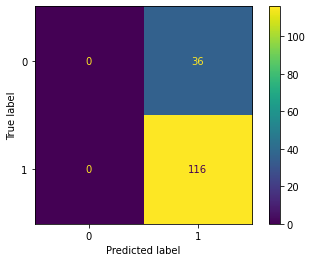

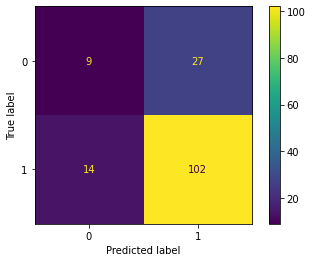

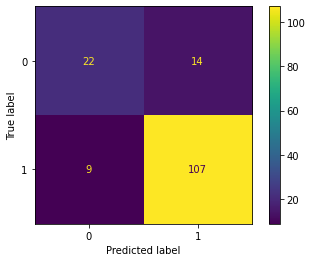

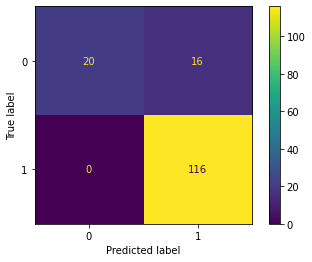

In [511]:
model5 = LinearSVC()
model5.fit(X_train, y_train)
model5.score(X_test, y_test)
y_pred = model5.predict(X_test)
print(model_report(y_test,y_pred))
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)
model6.score(X_test, y_test)
y_pred = model6.predict(X_test)
print(model_report(y_test,y_pred))
model7 = BaggingClassifier()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)
y_pred = model7.predict(X_test)
print(model_report(y_test,y_pred))
model8 = RandomForestClassifier(n_estimators = 100)
model8.fit(X_train, y_train)
model8.score(X_test, y_test)
y_pred = model8.predict(X_test)
print(model_report(y_test,y_pred))

In [512]:
y_probs = model3.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.3, 1. , 0.3, 0.9, 1. , 1. , 0.7, 0.3, 0.6, 1. ])

In [513]:
roc_auc_score(y_test, y_probs_positive)

0.8503352490421456

In [514]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

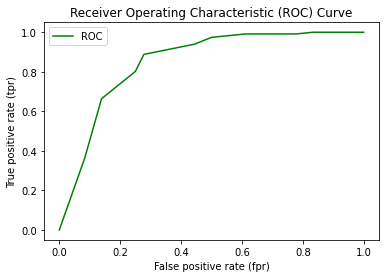

In [515]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)